### 데이터 전처리

#### 주식형 펀드 전처리

In [158]:
import pandas as pd
import os

# 주식형 펀드 파일 불러오기
fund_df = pd.read_excel('./excel/주식형펀드/미래에셋3억만들기솔로몬증권투자신탁1호(주식)_가격변동추이_20220728.xls')
fund_df.head(5)

,기준일자,기준가격,전일대비\n등락,과표기준\n가격,설정원본,벤치마크지수,벤치마크지수.1,벤치마크지수.2,벤치마크지수.3,벤치마크지수.4
0,기준일자,기준가격,전일대비\n등락,과표기준\n가격,설정원본,KOSPI,KOSPI200,KOSDAQ,국공채(3년만기),회사채(3년만기)
1,2022/07/01,983.32,-16.58,1014.15,83953,2305.42,304.02,729.48,3.439,4.691
2,2022/06/30,999.9,-18,1014.14,84373,2332.64,307.2,745.44,3.552,4.794
3,2022/06/29,1017.9,10.85,1011.44,84396,2377.99,312.66,762.35,3.552,4.793
4,2022/06/28,1007.05,15.74,1011.44,84403,2422.09,319.11,769.51,3.552,4.793


In [159]:
# 필요한 컬럼만 남긴다
# 기준일자, 기준가격, 전일대비\n등락, 벤치마크지수
fund_df = fund_df[["기준일자", "기준가격", "벤치마크지수"]]
fund_df.head()

,기준일자,기준가격,벤치마크지수
0,기준일자,기준가격,KOSPI
1,2022/07/01,983.32,2305.42
2,2022/06/30,999.9,2332.64
3,2022/06/29,1017.9,2377.99
4,2022/06/28,1007.05,2422.09


In [160]:
# 컬럼명 변경
fund_df.rename(columns={"벤치마크지수" : "KOSPI"}, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI
0,기준일자,기준가격,KOSPI
1,2022/07/01,983.32,2305.42
2,2022/06/30,999.9,2332.64
3,2022/06/29,1017.9,2377.99
4,2022/06/28,1007.05,2422.09


In [161]:
# 불필요 행 제거
fund_df = fund_df.loc[1:]
fund_df.head()

,기준일자,기준가격,KOSPI
1,2022/07/01,983.32,2305.42
2,2022/06/30,999.9,2332.64
3,2022/06/29,1017.9,2377.99
4,2022/06/28,1007.05,2422.09
5,2022/06/27,991.31,2401.92


In [162]:
# 기준일자 오름차순으로 변경
fund_df.sort_values("기준일자", ascending=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI
765,2019/06/03,895.87,2067.85
764,2019/06/04,904.98,2066.97
763,2019/06/05,903.08,2069.11
762,2019/06/07,906.01,2072.33
761,2019/06/10,909.27,2099.49


In [163]:
# 인덱스 재설정
fund_df.reset_index(drop=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI
0,2019/06/03,895.87,2067.85
1,2019/06/04,904.98,2066.97
2,2019/06/05,903.08,2069.11
3,2019/06/07,906.01,2072.33
4,2019/06/10,909.27,2099.49


In [166]:
fund_df["기준일자"] = fund_df["기준일자"].str.replace("/", "")
fund_df["기준월"] = fund_df["기준일자"].astype(str).str[:6]
fund_df.head()

,기준일자,기준가격,KOSPI,기준월
0,20190603,895.87,2067.85,201906
1,20190604,904.98,2066.97,201906
2,20190605,903.08,2069.11,201906
3,20190607,906.01,2072.33,201906
4,20190610,909.27,2099.49,201906


In [186]:
fund_df["기준가격"] = fund_df["기준가격"].astype(float)

In [197]:
# 수익률 표준편차
monthly_std = fund_df.groupby(["기준월"])["기준가격"].std(ddof=0)
monthly_std = pd.DataFrame(monthly_std)
monthly_std

,기준가격
기준월,
201906,8.646270
201907,11.108913
201908,12.444479
201909,18.943068
201910,8.279298
201911,7.940166
201912,26.093836
202001,19.841843
202002,27.329183


In [196]:
# 기준일자별 마지막 날짜
monthly_last_day = fund_df.groupby(["기준월"])["기준일자"].max()
monthly_last_day = pd.DataFrame(monthly_last_day)
monthly_last_day

,기준일자
기준월,
201906,20190628
201907,20190731
201908,20190830
201909,20190930
201910,20191031
201911,20191129
201912,20191231
202001,20200131
202002,20200228


In [175]:
df = pd.merge(monthly_last_day, fund_df, how="left", on="기준일자")
df

,기준일자,기준가격,KOSPI,기준월
0,20190628,927.94,2130.62,201906
1,20190731,892.02,2030.05,201907
2,20190830,868.3,1967.79,201908
3,20190930,925.39,2063.05,201909
4,20191031,928.09,2083.48,201910
5,20191129,931.71,2089.8,201911
6,20191231,989.23,2197.67,201912
7,20200131,967.43,2131.08,202001
8,20200228,940.15,1987.01,202002
9,20200331,797.9,1754.64,202003


In [198]:
df = pd.merge(df, monthly_std, how="left", on="기준월")
df

,기준일자,기준가격_x,KOSPI,기준월,기준가격_y
0,20190628,927.94,2130.62,201906,8.646270
1,20190731,892.02,2030.05,201907,11.108913
2,20190830,868.3,1967.79,201908,12.444479
3,20190930,925.39,2063.05,201909,18.943068
4,20191031,928.09,2083.48,201910,8.279298
5,20191129,931.71,2089.8,201911,7.940166
6,20191231,989.23,2197.67,201912,26.093836
7,20200131,967.43,2131.08,202001,19.841843
8,20200228,940.15,1987.01,202002,27.329183
9,20200331,797.9,1754.64,202003,81.253925


In [199]:
df.rename(columns={"기준가격_x" : "기준가격",
                   "기준가격_y" : "수익률 표준편차"}, inplace=True)
df.head()

,기준일자,기준가격,KOSPI,기준월,수익률 표준편차
0,20190628,927.94,2130.62,201906,8.646270
1,20190731,892.02,2030.05,201907,11.108913
2,20190830,868.3,1967.79,201908,12.444479
3,20190930,925.39,2063.05,201909,18.943068
4,20191031,928.09,2083.48,201910,8.279298


In [200]:
df["월별수익률"] = df["기준가격"].pct_change()
df.head()

,기준일자,기준가격,KOSPI,기준월,수익률 표준편차,월별수익률
0,20190628,927.94,2130.62,201906,8.646270,NaN
1,20190731,892.02,2030.05,201907,11.108913,-0.038709
2,20190830,868.3,1967.79,201908,12.444479,-0.026591
3,20190930,925.39,2063.05,201909,18.943068,0.065749
4,20191031,928.09,2083.48,201910,8.279298,0.002918


In [201]:
df["KOSPI 월별수익률"] = df["KOSPI"].pct_change()
df.head()

,기준일자,기준가격,KOSPI,기준월,수익률 표준편차,월별수익률,KOSPI 월별수익률
0,20190628,927.94,2130.62,201906,8.646270,NaN,NaN
1,20190731,892.02,2030.05,201907,11.108913,-0.038709,-0.047202
2,20190830,868.3,1967.79,201908,12.444479,-0.026591,-0.030669
3,20190930,925.39,2063.05,201909,18.943068,0.065749,0.048410
4,20191031,928.09,2083.48,201910,8.279298,0.002918,0.009903


In [202]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,기준일자,기준가격,KOSPI,기준월,수익률 표준편차,월별수익률,KOSPI 월별수익률
0,20190731,892.02,2030.05,201907,11.108913,-0.038709,-0.047202
1,20190830,868.3,1967.79,201908,12.444479,-0.026591,-0.030669
2,20190930,925.39,2063.05,201909,18.943068,0.065749,0.048410
3,20191031,928.09,2083.48,201910,8.279298,0.002918,0.009903
4,20191129,931.71,2089.8,201911,7.940166,0.003900,0.003033


In [111]:
# 월별수익률 컬럼 생성 및 계산
fund_df["월별수익률"] = fund_df["기준가격"].pct_change()
fund_df.head()

,기준일자,기준가격,KOSPI,월별수익률
0,2019/06/28,927.94,2130.62,NaN
1,2019/07/31,892.02,2030.05,-0.038709
2,2019/08/30,868.3,1967.79,-0.026591
3,2019/09/30,925.39,2063.05,0.065749
4,2019/10/31,928.09,2083.48,0.002918


In [112]:
# KOSPI수익률 컬럼 생성 및 계산
fund_df["KOSPI 월별수익률"] = fund_df["KOSPI"].pct_change()
fund_df.head()

,기준일자,기준가격,KOSPI,월별수익률,KOSPI 월별수익률
0,2019/06/28,927.94,2130.62,NaN,NaN
1,2019/07/31,892.02,2030.05,-0.038709,-0.047202
2,2019/08/30,868.3,1967.79,-0.026591,-0.030669
3,2019/09/30,925.39,2063.05,0.065749,0.048410
4,2019/10/31,928.09,2083.48,0.002918,0.009903


In [113]:
# NaN값 제거
fund_df.dropna(inplace=True)
fund_df.reset_index(drop=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI,월별수익률,KOSPI 월별수익률
0,2019/07/31,892.02,2030.05,-0.038709,-0.047202
1,2019/08/30,868.3,1967.79,-0.026591,-0.030669
2,2019/09/30,925.39,2063.05,0.065749,0.048410
3,2019/10/31,928.09,2083.48,0.002918,0.009903
4,2019/11/29,931.71,2089.8,0.003900,0.003033


#### CD금리 전처리

In [203]:
import pandas as pd

# 월별 CD금리 파일 불러오기
cd_df = pd.read_csv('./csv/월별_CD금리.csv')
cd_df.head()

,변환,원자료
0,2019/07,1.68
1,2019/08,1.49
2,2019/09,1.54
3,2019/10,1.46
4,2019/11,1.52


In [204]:
# fund_df 복사
fund_cd_df = df.copy()

In [205]:
# CD금리 컬럼 추가
fund_cd_df["CD금리"] = cd_df["원자료"]
fund_cd_df.head()

,기준일자,기준가격,KOSPI,기준월,수익률 표준편차,월별수익률,KOSPI 월별수익률,CD금리
0,20190731,892.02,2030.05,201907,11.108913,-0.038709,-0.047202,1.68
1,20190830,868.3,1967.79,201908,12.444479,-0.026591,-0.030669,1.49
2,20190930,925.39,2063.05,201909,18.943068,0.065749,0.048410,1.54
3,20191031,928.09,2083.48,201910,8.279298,0.002918,0.009903,1.46
4,20191129,931.71,2089.8,201911,7.940166,0.003900,0.003033,1.52


In [147]:
fund_cd_df.dtypes

기준일자            object
기준가격            object
KOSPI           object
월별수익률          float64
KOSPI 월별수익률    float64
CD금리           float64
dtype: object

In [148]:
# 기준일자에서 월까지만 추출해서 기준월 컬럼 생성
fund_cd_df["기준월"] = fund_cd_df["기준일자"].astype(str).str[:7]

In [149]:
# 컬럼 순서 재정렬
fund_cd_df = fund_cd_df[["기준일자", "기준가격", "KOSPI", "기준월", "월별수익률", "KOSPI 월별수익률", "CD금리"]]
fund_cd_df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,KOSPI 월별수익률,CD금리
0,2019/07/31,892.02,2030.05,2019/07,-0.038709,-0.047202,1.68
1,2019/08/30,868.3,1967.79,2019/08,-0.026591,-0.030669,1.49
2,2019/09/30,925.39,2063.05,2019/09,0.065749,0.048410,1.54
3,2019/10/31,928.09,2083.48,2019/10,0.002918,0.009903,1.46
4,2019/11/29,931.71,2089.8,2019/11,0.003900,0.003033,1.52


In [206]:
fund_cd_df["CD금리"] = fund_cd_df["CD금리"]/100

In [207]:
fund_cd_df.head()

,기준일자,기준가격,KOSPI,기준월,수익률 표준편차,월별수익률,KOSPI 월별수익률,CD금리
0,20190731,892.02,2030.05,201907,11.108913,-0.038709,-0.047202,0.0168
1,20190830,868.3,1967.79,201908,12.444479,-0.026591,-0.030669,0.0149
2,20190930,925.39,2063.05,201909,18.943068,0.065749,0.048410,0.0154
3,20191031,928.09,2083.48,201910,8.279298,0.002918,0.009903,0.0146
4,20191129,931.71,2089.8,201911,7.940166,0.003900,0.003033,0.0152


### 정규성 검정

In [208]:
from scipy.stats import shapiro
import numpy as np

shapiro(fund_cd_df["월별수익률"])

ShapiroResult(statistic=0.9479657411575317, pvalue=0.0829838439822197)

d:\anaconda3\envs\py36_32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='월별수익률', ylabel='Density'>

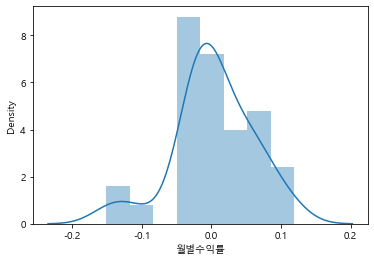

In [209]:
# 히스토그램
import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

sns.distplot(fund_cd_df["월별수익률"])

d:\anaconda3\envs\py36_32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='월별수익률', ylabel='Density'>

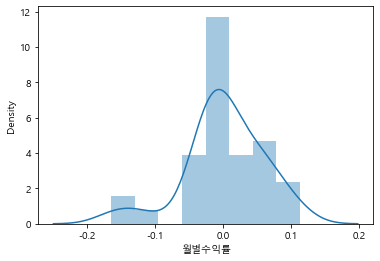

In [210]:
sns.distplot(np.log1p(fund_cd_df["월별수익률"]))

((array([-2.0844567 , -1.69509426, -1.46257551, -1.28983027, -1.14880688,
         -1.0275498 , -0.91978012, -0.82175965, -0.73106454, -0.646021  ,
         -0.56541462, -0.48832761, -0.41404133, -0.34197479, -0.27164383,
         -0.20263297, -0.13457495, -0.06713532,  0.        ,  0.06713532,
          0.13457495,  0.20263297,  0.27164383,  0.34197479,  0.41404133,
          0.48832761,  0.56541462,  0.646021  ,  0.73106454,  0.82175965,
          0.91978012,  1.0275498 ,  1.14880688,  1.28983027,  1.46257551,
          1.69509426,  2.0844567 ]),
  array([-0.15130564, -0.13122372, -0.10554706, -0.04641622, -0.0387094 ,
         -0.03213274, -0.02819842, -0.02659133, -0.02270643, -0.02203734,
         -0.02118577, -0.01882895, -0.01857116, -0.01658166, -0.01353127,
         -0.01016321, -0.0037636 , -0.00254079,  0.00116532,  0.00291769,
          0.00390048,  0.00617445,  0.00617756,  0.02205989,  0.02314195,
          0.02572999,  0.02630035,  0.03700836,  0.05203343,  0.05560503,
 

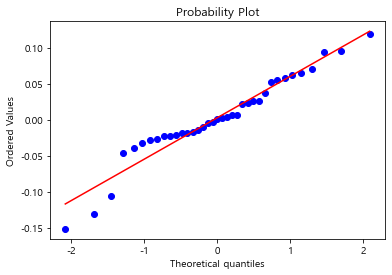

In [211]:
# Q-Q plot
import scipy.stats as stats

stats.probplot(fund_cd_df["월별수익률"], plot=plt)

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([-0.16405616, -0.14066963, -0.11154298, -0.04752799, -0.03947852,
         -0.03266033, -0.02860363, -0.02695128, -0.02296819, -0.02228379,
         -0.02141341, -0.01900847, -0.01874577, -0.01362365, -0.01021521,
         -0.00377071, -0.00254403,  0.00116464,  0.00291344,  0.0038929 ,
          0.00615547,  0.00615856,  0.02182009,  0.02287824,  0.02540454,
          0.02596044,  0.03633999,  0.05072489,  0.05411409,  0.05671927,
          0.05

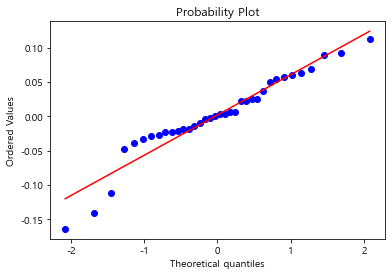

In [ ]:
stats.probplot(np.log1p(fund_cd_df["월별수익률"]), plot=plt)

In [212]:
excess_return = fund_cd_df["월별수익률"]-fund_cd_df["CD금리"]
return_std = (fund_cd_df["수익률 표준편차"])

In [217]:
sharpe_df = pd.DataFrame()
sharpe_df["기준월"] = df["기준월"]
sharpe_df["excess_return"] = excess_return
sharpe_df["return_std"] = return_std/100
sharpe_df

,기준월,excess_return,return_std
0,201907,-0.055509,0.111089
1,201908,-0.041491,0.124445
2,201909,0.050349,0.189431
3,201910,-0.011682,0.082793
4,201911,-0.011300,0.079402
5,201912,0.046436,0.260938
6,202001,-0.036737,0.198418
7,202002,-0.042398,0.273292
8,202003,-0.163606,0.812539
9,202004,0.085165,0.274394


In [218]:
sharpe_df["샤프지수"] = "" 
sharpe_df["샤프지수"] = sharpe_df["excess_return"].apply(lambda x : x/sharpe_df["return_std"] if x >= 0 else x*sharpe_df["return_std"])

In [219]:
sharpe_df

,기준월,excess_return,return_std,샤프지수
0,201907,-0.055509,0.111089,-0.006166
1,201908,-0.041491,0.124445,-0.004609
2,201909,0.050349,0.189431,0.453232
3,201910,-0.011682,0.082793,-0.001298
4,201911,-0.011300,0.079402,-0.001255
5,201912,0.046436,0.260938,0.418006
6,202001,-0.036737,0.198418,-0.004081
7,202002,-0.042398,0.273292,-0.004710
8,202003,-0.163606,0.812539,-0.018175
9,202004,0.085165,0.274394,0.766636
